In [1]:
import keras
from keras.layers import Conv2D, Input
from keras.layers import Input,Activation
from keras.layers.convolutional import Deconv2D as Conv2DTranspose
from keras.layers.merge import add
from keras.models import Sequential, Model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

/home/savath/.virtualenvs/wazir/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
input_img = Input(shape=(32,32,1),name='INPUT_IMAGE') 
B11C = Conv2D(64,(9,9), padding='same',name='CONVOLUTION_B11C')(input_img)
B11A = Activation('relu',name='RELU_B11A')(B11C)
B21C = Conv2D(56,(5,5), padding='same',name='CONVOLUTIONB_B21C')(B11A)
B21A = Activation('relu',name='RELU_B21A')(B21C)
B22C = Conv2D(12,(1,1), padding='same',name='CONVOLUTION_B22C')(B21A)
B22A = Activation('relu',name='RELU_B22A')(B22C)
B23C = Conv2D(64, (3,3), padding='same',name='CONVOLUTION_B23C')(B22A)
DC1  = Conv2DTranspose(64, (1,1),name='TRANSPOSE_CONVOLUTION_DC1')(B23C)
B24C = Conv2D(64, (3,3), padding='same',name='CONVOLUTIONC_B24C')(DC1)
DC2  = Conv2DTranspose(64, (1,1),name='TRANSPOSE_CONVOLUTION_DC2')(B24C)
B25C = Conv2D(64, (3,3), padding='same',name='CONVOLUTION_B25C')(DC2)
m3   = add([input_img, B25C],name='ADDITIONOFLAYERS')
output = Conv2D(1, (13, 13), padding='valid', name='OUTPUT_OF_LAYERS')(m3)
model=Model(input_img,output)

In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
INPUT_IMAGE (InputLayer)        (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
CONVOLUTION_B11C (Conv2D)       (None, 32, 32, 64)   5248        INPUT_IMAGE[0][0]                
__________________________________________________________________________________________________
RELU_B11A (Activation)          (None, 32, 32, 64)   0           CONVOLUTION_B11C[0][0]           
__________________________________________________________________________________________________
CONVOLUTIONB_B21C (Conv2D)      (None, 32, 32, 56)   89656       RELU_B11A[0][0]                  
__________________________________________________________________________________________________
RELU_B21A 

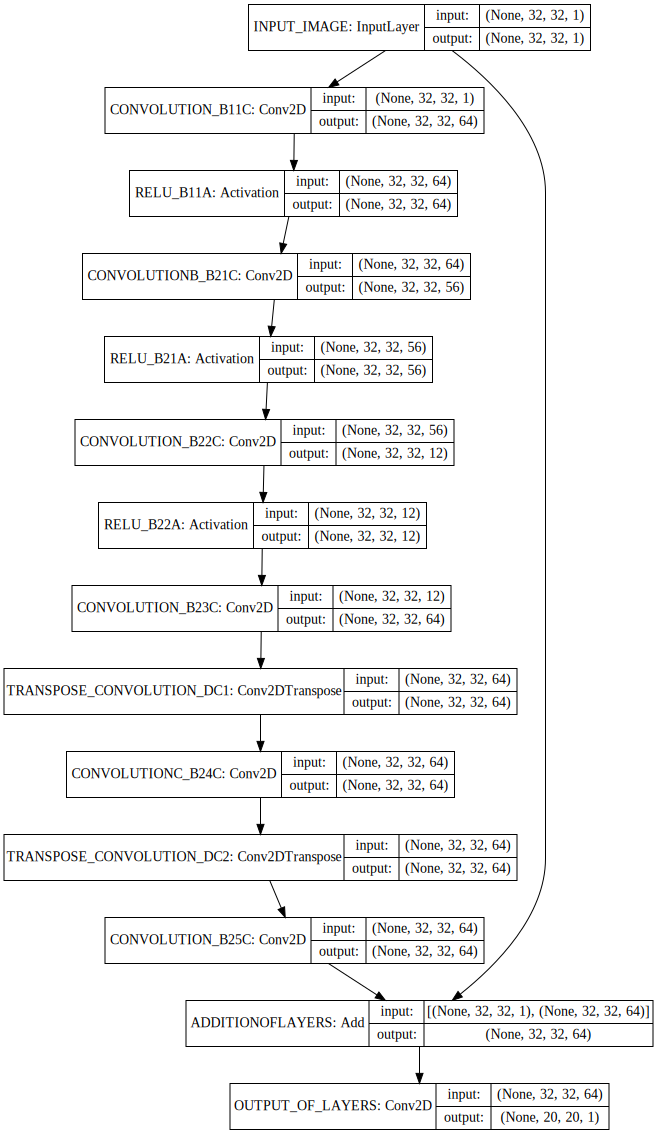

In [4]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))